# 5G Planning — Scenario Setup and Coverage Modeling

This notebook defines the planning scenario (area, users, base stations)
and evaluates coverage using a simplified propagation-based proxy.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.geometry import make_grid
from src.users import users_uniform, users_hotspots
from src.baselines import random_bs, grid_bs, kmeans_bs
from src.coverage import coverage_score, best_power_map


In [3]:
AREA_M = 2000.0        # 2 km x 2 km
GRID_STEP = 40.0       # grid resolution
N_USERS = 400
N_BS = 6

FREQ_HZ = 3.5e9        # 3.5 GHz
TX_DBM = 46.0          # macro BS
THR_DBM = -90.0


In [4]:
grid = make_grid(AREA_M, GRID_STEP)
users = users_hotspots(N_USERS, AREA_M, n_hotspots=3, seed=1)

bs_random = random_bs(N_BS, AREA_M, seed=1)
bs_grid   = grid_bs(N_BS, AREA_M)
bs_kmeans = kmeans_bs(users, N_BS, seed=1)


In [5]:
scores = {
    "Random": coverage_score(grid, bs_random, TX_DBM, FREQ_HZ, THR_DBM),
    "Grid": coverage_score(grid, bs_grid, TX_DBM, FREQ_HZ, THR_DBM),
    "KMeans": coverage_score(grid, bs_kmeans, TX_DBM, FREQ_HZ, THR_DBM),
}

scores


{'Random': 1.0, 'Grid': 1.0, 'KMeans': 1.0}

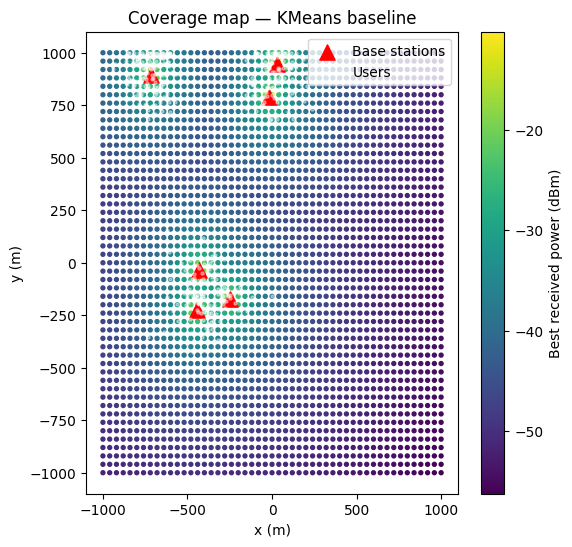

In [6]:
power_map = best_power_map(grid, bs_kmeans, TX_DBM, FREQ_HZ)

plt.figure(figsize=(6,6))
plt.scatter(grid[:,0], grid[:,1], c=power_map, s=8, cmap="viridis")
plt.colorbar(label="Best received power (dBm)")
plt.scatter(bs_kmeans[:,0], bs_kmeans[:,1], c="red", marker="^", s=120, label="Base stations")
plt.scatter(users[:,0], users[:,1], c="white", s=5, alpha=0.4, label="Users")
plt.legend()
plt.title("Coverage map — KMeans baseline")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()


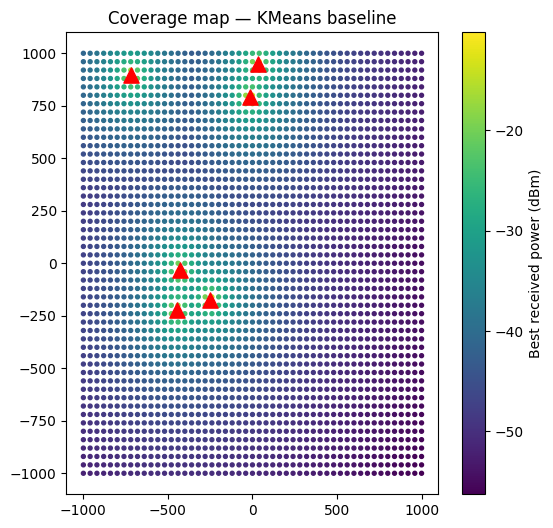

In [7]:
import os

os.makedirs("../results/figures", exist_ok=True)
plt.figure(figsize=(6,6))
plt.scatter(grid[:,0], grid[:,1], c=power_map, s=8, cmap="viridis")
plt.colorbar(label="Best received power (dBm)")
plt.scatter(bs_kmeans[:,0], bs_kmeans[:,1], c="red", marker="^", s=120)
plt.title("Coverage map — KMeans baseline")
plt.savefig("../results/figures/kmeans_coverage.png", dpi=200, bbox_inches="tight")
plt.show()


In [8]:
import pandas as pd

df = pd.DataFrame(
    [{"Method": k, "CoverageScore": v} for k, v in scores.items()]
).sort_values("CoverageScore", ascending=False)

df


,Method,CoverageScore
0,Random,1.0
1,Grid,1.0
2,KMeans,1.0


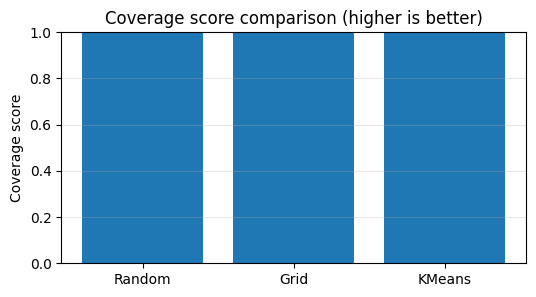

In [9]:
plt.figure(figsize=(6,3))
plt.bar(df["Method"], df["CoverageScore"])
plt.ylim(0, 1)
plt.grid(True, axis="y", alpha=0.3)
plt.title("Coverage score comparison (higher is better)")
plt.ylabel("Coverage score")
plt.show()


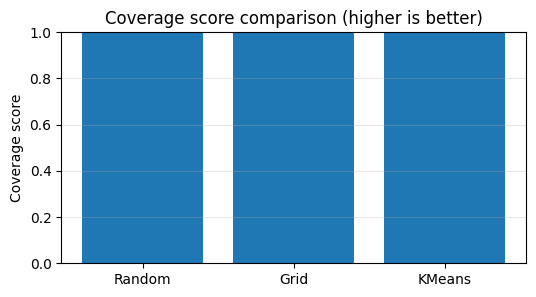

In [10]:
import os
os.makedirs("../results/figures", exist_ok=True)

plt.figure(figsize=(6,3))
plt.bar(df["Method"], df["CoverageScore"])
plt.ylim(0, 1)
plt.grid(True, axis="y", alpha=0.3)
plt.title("Coverage score comparison (higher is better)")
plt.ylabel("Coverage score")
plt.savefig("../results/figures/baselines_coverage_comparison.png", dpi=200, bbox_inches="tight")
plt.show()
